In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
sns.set_theme(context="notebook", font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv("Loan_Default.csv")

In [27]:
data.drop(columns=["ID"], inplace=True)

In [28]:
data.head()

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [29]:
data = data.infer_objects()

In [30]:
data['loan_amount'] = data['loan_amount'].astype('float')
data['Credit_Score'] = data['Credit_Score'].astype('float')
data.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


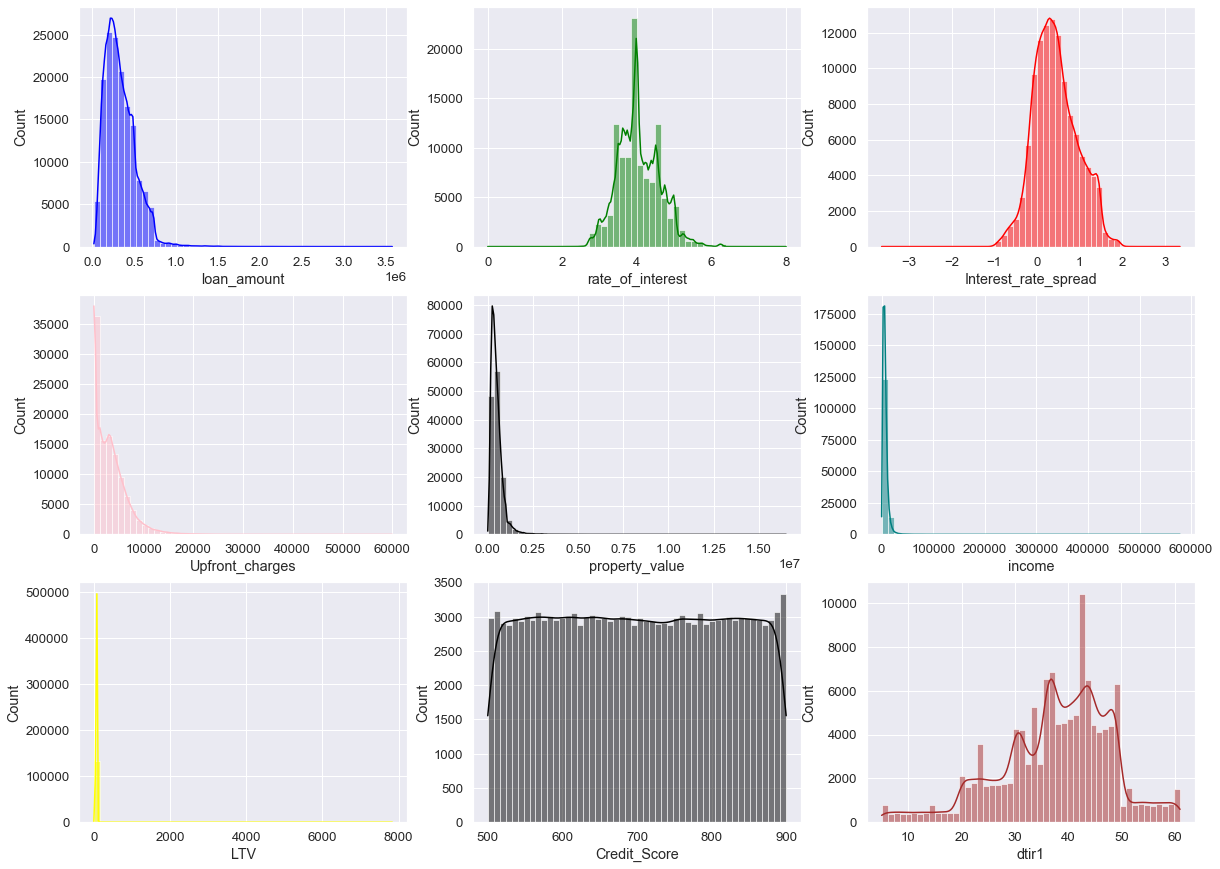

In [31]:
fig, ax = plt.subplots(3, 3, figsize=[20, 15])
sns.histplot(data=data, x='loan_amount', ax=ax[0][0], color='blue', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='rate_of_interest', ax=ax[0][1], color='green', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='Interest_rate_spread', ax=ax[0][2], color='red', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='Upfront_charges', ax=ax[1][0], color='pink', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='property_value', ax=ax[1][1], color='black', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='income', ax=ax[1][2], color='teal', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='LTV', ax=ax[2][0], color='yellow', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='Credit_Score', ax=ax[2][1], color='black', alpha=0.5, bins=50, kde=True)
sns.histplot(data=data, x='dtir1', ax=ax[2][2], color='brown', alpha=0.5, bins=50, kde=True)
plt.show()

In [32]:
data.dtypes

year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                  float64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                 float64
co-applicant_credit_type      object
age                           object
s

In [33]:
data.isna().sum()

year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [34]:
data.shape

(148670, 33)

In [35]:
data = data.fillna(method="ffill") ## Need to check this for the future

In [36]:
data.isna().sum().sum()

6

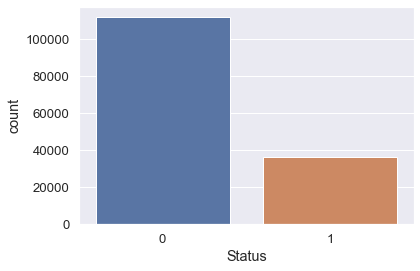

In [37]:
sns.countplot(data["Status"])
plt.show()

In [38]:
data = data.infer_objects()

In [39]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [40]:
object_cols = data.select_dtypes('O').columns
for i in object_cols:
    print(f"Column: {i} -- contains -- \t\t {data[i].unique()}")

Column: loan_limit -- contains -- 		 ['cf' 'ncf']
Column: Gender -- contains -- 		 ['Sex Not Available' 'Male' 'Joint' 'Female']
Column: approv_in_adv -- contains -- 		 ['nopre' 'pre']
Column: loan_type -- contains -- 		 ['type1' 'type2' 'type3']
Column: loan_purpose -- contains -- 		 ['p1' 'p4' 'p3' 'p2']
Column: Credit_Worthiness -- contains -- 		 ['l1' 'l2']
Column: open_credit -- contains -- 		 ['nopc' 'opc']
Column: business_or_commercial -- contains -- 		 ['nob/c' 'b/c']
Column: Neg_ammortization -- contains -- 		 ['not_neg' 'neg_amm']
Column: interest_only -- contains -- 		 ['not_int' 'int_only']
Column: lump_sum_payment -- contains -- 		 ['not_lpsm' 'lpsm']
Column: construction_type -- contains -- 		 ['sb' 'mh']
Column: occupancy_type -- contains -- 		 ['pr' 'sr' 'ir']
Column: Secured_by -- contains -- 		 ['home' 'land']
Column: total_units -- contains -- 		 ['1U' '2U' '3U' '4U']
Column: credit_type -- contains -- 		 ['EXP' 'EQUI' 'CRIF' 'CIB']
Column: co-applicant_credit_type 

In [41]:
data = pd.get_dummies(data)
data.reset_index(drop=True, inplace=True)

In [42]:
data.shape

(148670, 71)

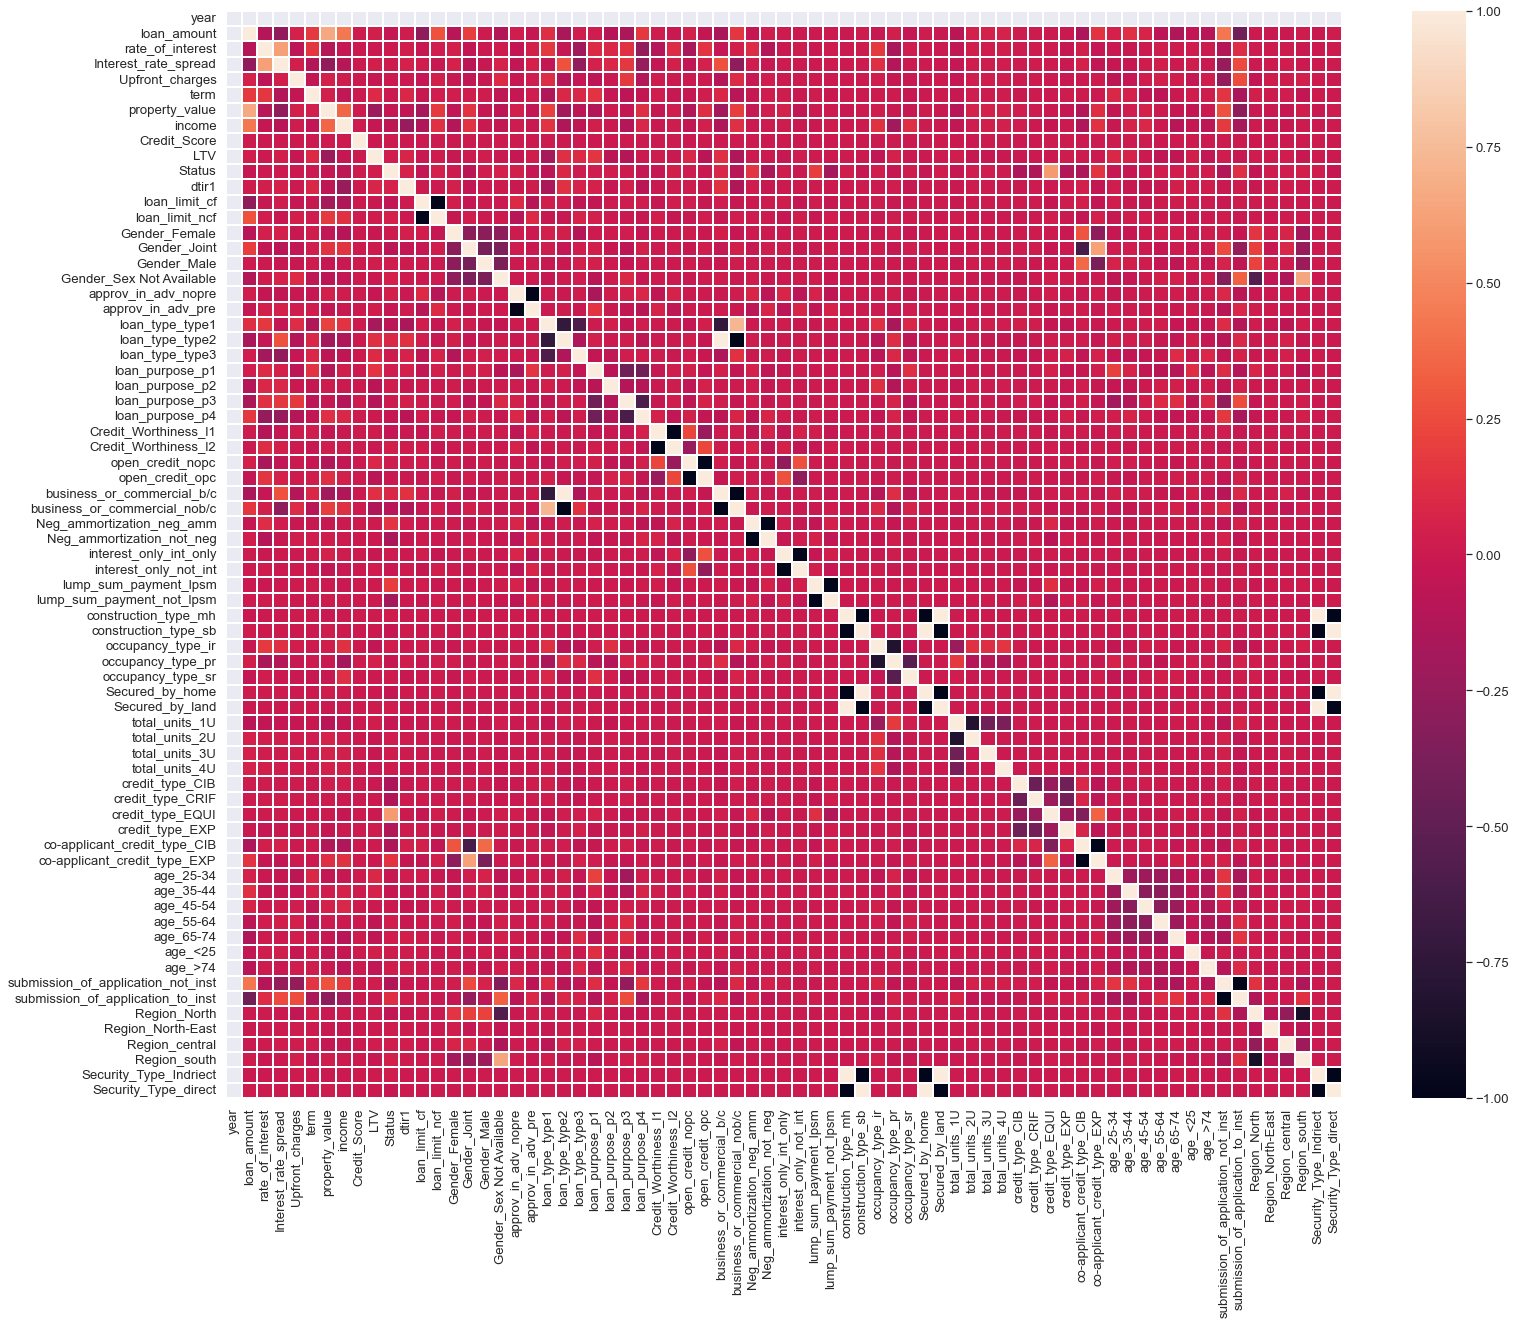

In [43]:
plt.figure(figsize=[25,20])
co = data.corr()
sns.heatmap(co, linewidth=0.05)
plt.show()

In [44]:
data.select_dtypes('float').columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1'],
      dtype='object')

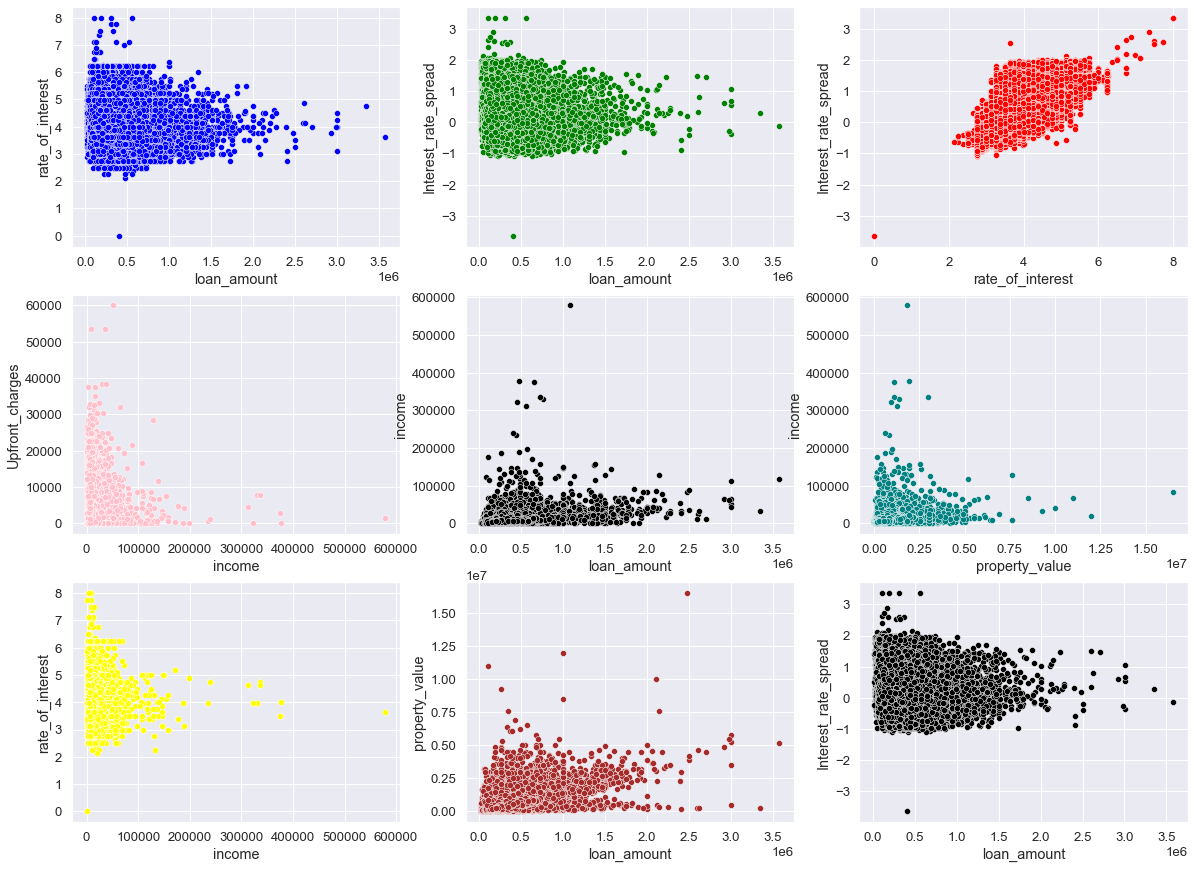

In [45]:
fig, ax = plt.subplots(3, 3, figsize=[20, 15])
sns.scatterplot(data["loan_amount"], data["rate_of_interest"], ax=ax[0][0], color='blue')
sns.scatterplot(data["loan_amount"], data["Interest_rate_spread"], ax=ax[0][1], color='green')
sns.scatterplot(data["rate_of_interest"], data["Interest_rate_spread"], ax=ax[0][2], color='red')
sns.scatterplot(data["income"], data["Upfront_charges"], ax=ax[1][0], color='pink')
sns.scatterplot(data["loan_amount"], data["income"], ax=ax[1][1], color='black')
sns.scatterplot(data["property_value"], data["income"], ax=ax[1][2], color='teal')
sns.scatterplot(data["income"], data["rate_of_interest"], ax=ax[2][0], color='yellow')
sns.scatterplot(data["loan_amount"], data["property_value"], ax=ax[2][1], color='brown')
sns.scatterplot(data["loan_amount"], data["Interest_rate_spread"], ax=ax[2][2], color='black')
plt.show()

In [46]:
data.to_csv('Loan_Default_Cleaned.csv')